# Testing out double classification procedure

## Arrow head dataset

In [159]:
from sktime.classification.compose import TimeSeriesForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sktime.datasets import load_arrow_head
from sktime.transformations.panel.catch22_features import Catch22

X, y = load_arrow_head(return_X_y=True)
c22f = Catch22()
c22f.fit(X, y)
X = c22f.transform(X)

X_train_og, X_test, y_train_og, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train_og, y_train_og, test_size = 0.5, random_state = 1)


print('Original train value counts = ', y_train_og.value_counts())
print('Train value counts = ', y_train.value_counts())
print('Validation value counts = ', y_val.value_counts())
print('Test value counts = ', y_test.value_counts())

Original train value counts =  0    63
1    53
2    52
dtype: int64
Train value counts =  0    35
1    27
2    22
dtype: int64
Validation value counts =  2    30
0    28
1    26
dtype: int64
Test value counts =  0    18
2    13
1    12
dtype: int64


### Initial classification without using a double classifier

In [160]:
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_og,y_train_og)
clf = logreg_cv.best_estimator_

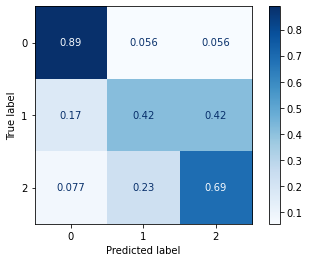

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

class_names = [0,1,2]


plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

### Creating the second classifier

In [162]:
import pandas as pd
import numpy as np

new_X = X_val
logreg_cv.fit(X_train,y_train)
clf = logreg_cv.best_estimator_
y_pred = clf.predict(X_val)
new_y = pd.Series(np.hstack([y_pred != y_val]))


logreg_cv.fit(new_X,new_y)
clf_2 = logreg_cv.best_estimator_
y_pred_2 = clf_2.predict(X_test)
to_del = np.where(y_pred_2 == True)[0]
X_test = X_test.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)


X_test_new = X_test[~X_test.index.isin(to_del)]
y_test_new = y_test[~y_test.index.isin(to_del)]

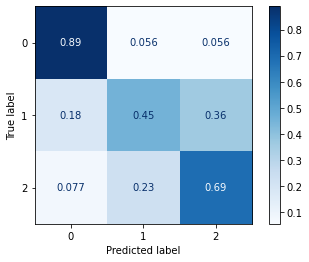

In [163]:
class_names = [0,1,2]
clf = LogisticRegression(random_state=0).fit(X_train_og, y_train_og)


plot_confusion_matrix(clf, X_test_new, y_test_new,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

## Iris

In [157]:
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target)


X_train_og, X_test, y_train_og, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train_og, y_train_og, test_size = 0.5, random_state = 1)


import warnings
from sklearn.exceptions import ConvergenceWarning, DataConversionWarning, FitFailedWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FitFailedWarning)

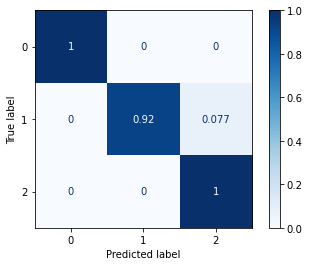

In [153]:
logreg_cv.fit(X_train_og,y_train_og)
clf = logreg_cv.best_estimator_
plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=[0,1,2],
                                 cmap=plt.cm.Blues,
                                 normalize='true')

/home/andrine/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


(30, 4)


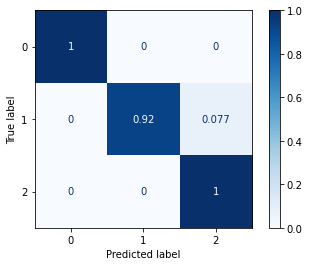

In [158]:
new_X = X_val
logreg_cv.fit(X_train,y_train)
clf = logreg_cv.best_estimator_
y_pred = clf.predict(X_val)
y_val = np.transpose(y_val.to_numpy())
new_y = pd.Series(np.hstack(y_pred != y_val))

logreg_cv.fit(new_X,new_y)
clf_2 = logreg_cv.best_estimator_
y_pred_2 = clf_2.predict(X_test)
to_del = np.where(y_pred_2 == True)[0]

X_test = X_test.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)


X_test_new = X_test[~X_test.index.isin(to_del)]
y_test_new = y_test[~y_test.index.isin(to_del)]

print(X_test_new.shape)

class_names = [0,1,2]
clf = LogisticRegression(random_state=0).fit(X_train_og, y_train_og)


plot_confusion_matrix(clf, X_test_new, y_test_new,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true')